In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('titanic_train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic_cleaned = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
titanic_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic_cleaned.corr(method='pearson')


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [13]:
titanic_cleaned.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [14]:
titanic_cleaned.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [15]:
titanic_cleaned.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
titanic_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

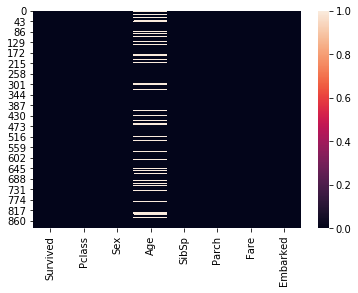

In [17]:
sns.heatmap(titanic_cleaned.isnull())

In [18]:
titanic_cleaned['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [19]:
titanic_cleaned['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
titanic_cleaned['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [21]:
titanic_cleaned['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
titanic_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [23]:
titanic_cleaned['Embarked'].replace(np.NaN,df['Embarked'].mean,inplace=True)

In [24]:
titanic_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

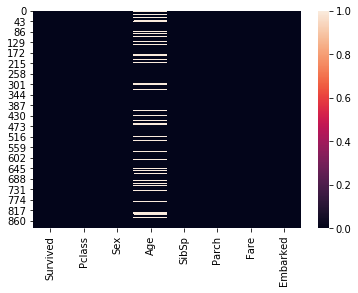

In [25]:
sns.heatmap(titanic_cleaned.isnull())

In [26]:
titanic_cleaned.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

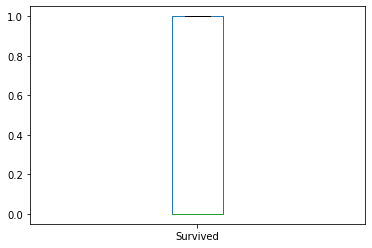

In [27]:
titanic_cleaned['Survived'].plot.box()

In [28]:
titanic_cleaned.groupby(['Pclass', 'Sex']).describe()

Survived                                                 Age  \
                 count      mean       std  min  25%  50%  75%  max  count   
Pclass Sex                                                                   
1      female     94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0   85.0   
       male      122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0  101.0   
2      female     76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0   74.0   
       male      108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0   99.0   
3      female    144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0  102.0   
       male      347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0  253.0   

                          ... Parch        Fare                         \
                    mean  ...   75%  max  count        mean        std   
Pclass Sex                ...                                            
1      female  34.611765  ...   1.0  2.0   94.0  106.125798  74.259988   
       male    41.281386  ...   0.0  4.0  122.0   67.226127  77.548021   
2      female  28.722973  ...   1.0  3.0   76.0   21.970121  10.891796   
       male    30.740707  ...   0.0  2.0  108.0   19.741782  14.922235   
3      female  21.750000  ...   1.0  6.0  144.0   16.118810  11.690314   
       male    26.507589  ...   0.0  5.0  347.0   12.661633  11.681696   

                                                                  
                   min       25%       50%         75%       max  
Pclass Sex                                                        
1      female  25.9292  57.24480  82.66455  134.500000  512.3292  
       male     0.0000  27.72810  41.26250   78.459375  512.3292  
2      female  10.5000  13.00000  22.00000   26.062500   65.0000  
       male     0.0000  12.33125  13.00000   26.000000   73.5000  
3      female   6.7500   7.85420  12.47500   20.221875   69.5500  
       male     0.0000   7.75000   7.92500   10.008300   69.5500  

[6 rows x 40 columns]

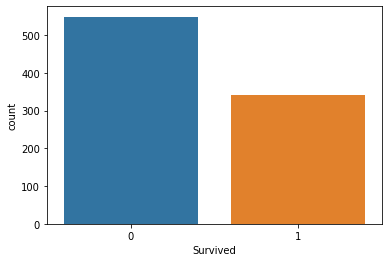

In [29]:
sns.countplot('Survived',data=titanic_cleaned)
plt.show()

In [30]:
titanic_cleaned.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

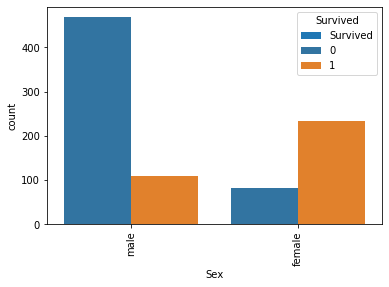

In [31]:
titanic_cleaned[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot('Sex',hue='Survived',data=titanic_cleaned)
plt.show()


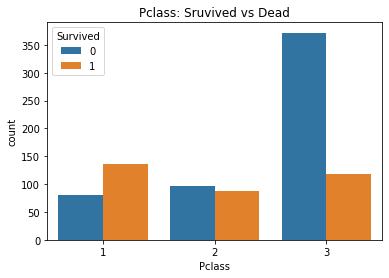

In [32]:
sns.countplot('Pclass', hue='Survived',data=titanic_cleaned)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

In [33]:
collist=titanic_cleaned.columns.values
ncol=14
nrows=10

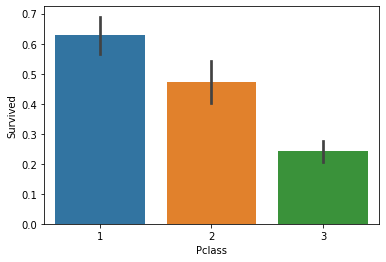

In [34]:
sns.barplot(x='Pclass', y='Survived', data=titanic_cleaned)

In [35]:
Sex = pd.get_dummies(titanic_cleaned['Sex'],drop_first=True)

#embark = pd.get_dummies(titanic_cleaned['Embarked'],drop_first=True)

In [36]:
import sys 
sys.setrecursionlimit(5000) 

In [37]:
titanic_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [39]:
titanic_cleaned.drop(['Sex','Embarked'],axis=1,inplace=True)

In [40]:
tc=titanic_cleaned.replace(np.NaN,0)
tc

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,0.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [41]:
tc.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [42]:
x=tc.iloc[:,1:]

In [43]:
x

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,0.0,1,2,23.4500
889,1,26.0,0,0,30.0000


In [44]:
x.shape

(891, 5)

In [45]:
y=tc.iloc[:,0].values

In [46]:
y.shape

(891,)

In [47]:
encoded_data = pd.get_dummies(tc)
encoded_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    y_pred_prob=lg.predict_proba(test_x)[:,1]
    pred=lg.predict(test_x)
    print(pred)
    r2_scr=r2_score(test_y,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print()
print()
print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    

[0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0]


NameError: name 'y_pred' is not defined

# Please rectify my error i am unable to use for loop

In [50]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=45)

In [51]:
lg=LogisticRegression()
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
pred=lg.predict(test_x)
print(pred)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0]


In [53]:
train_x.shape

(694, 5)

In [54]:

test_x.shape


(197, 5)

In [55]:
train_y.shape

(694,)

In [56]:

test_y.shape

(197,)

In [57]:
np.where(x.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [58]:
test_x.fillna(test_x.mean())

,Pclass,Age,SibSp,Parch,Fare
248,1,37.0,1,1,52.5542
197,3,42.0,0,1,8.4042
133,2,29.0,1,0,26.0000
169,3,28.0,0,0,56.4958
736,3,48.0,1,3,34.3750
...,...,...,...,...,...
120,2,21.0,2,0,73.5000
357,2,38.0,0,0,13.0000
44,3,19.0,0,0,7.8792
849,1,0.0,1,0,89.1042


In [60]:
from sklearn.metrics import accuracy_score

In [61]:
print('accuracy_score:',accuracy_score(test_y,pred))

accuracy_score: 0.7106598984771574


In [62]:
from sklearn.metrics import confusion_matrix,classification_report

In [63]:
print(confusion_matrix(test_y,pred))

[[112  15]
 [ 42  28]]


In [64]:
y_pred_prob

array([0.31798046, 0.38203469, 0.24849215, 0.5482902 , 0.22832559,
       0.65689414, 0.29580351, 0.19645303, 0.25741   , 0.7347673 ,
       0.54887564, 0.19873104, 0.24743397, 0.22616978, 0.37073228,
       0.70050348, 0.53332562, 0.29588191, 0.39627421, 0.56703243,
       0.23960667, 0.57564328, 0.2151898 , 0.2496475 , 0.30252811,
       0.27823065, 0.55932796, 0.3848431 , 0.29292644, 0.22459551,
       0.25071508, 0.24388145, 0.67543064, 0.29560559, 0.25311592,
       0.2044653 , 0.60335964, 0.29580351, 0.59244613, 0.29594784,
       0.38714315, 0.19500158, 0.29610053, 0.29580351, 0.24820233,
       0.41846227, 0.25094948, 0.24296094, 0.2388752 , 0.72392842,
       0.26836009, 0.61670604, 0.40602395, 0.79598628, 0.16140424,
       0.78322093, 0.37920407, 0.80696164, 0.38247506, 0.25070027,
       0.24612443, 0.51138998, 0.36119757, 0.67044132, 0.29580351,
       0.31150283, 0.48463145, 0.22882269, 0.26790461, 0.53385031,
       0.43080716, 0.8525758 , 0.60285209, 0.64165176, 0.24176

In [65]:
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [66]:
from sklearn.metrics import confusion_matrix

mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=5)
print('score:',score)

print('Mean Scores',score.mean())
print('standard deviation',score.std())
y_pred = cross_val_predict(mnb,x,y,cv=5)

print('y prediction values')
print(y_pred)

conf_mat=confusion_matrix(y,y_pred)
conf_mat

score: [0.58659218 0.6741573  0.58426966 0.62921348 0.64044944]
Mean Scores 0.6229364132822799
standard deviation 0.03401678466601542
y prediction values
[0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1
 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 1 0 0 1 0 

array([[373, 176],
       [160, 182]], dtype=int64)

In [67]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')
print('accuracy score=',score)

print('Mean Scores',score.mean())
print('standard deviation',score.std())
y_pred = cross_val_predict(sv,x,y,cv=5)

print('y prediction values')
print(y_pred)

conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy score= [0.57541899 0.71910112 0.68539326 0.68539326 0.68539326]
Mean Scores 0.6701399786579625
standard deviation 0.04912686882142354
y prediction values
[0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1

0.67003367003367

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')
print('F1-score:',score)
print('Mean Scores',score.mean())
print('standard deviation',score.std())
y_pred = cross_val_predict(dtc,x,y,cv=5)

print('y prediction values')
print(y_pred)

conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score: [0.63445323 0.60250642 0.62675866 0.64860449 0.65859788]
Mean Scores 0.634184135683075
standard deviation 0.019301118310596554
y prediction values
[0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0
 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1
 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1
 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1
 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0

array([[400, 149],
       [157, 185]], dtype=int64)

In [70]:
from sklearn.neighbors import KNeighborsClassifier



In [71]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('standard deviation',score.std())
y_pred = cross_val_predict(knn,x,y,cv=5)

print('y prediction values')
print(y_pred)

print('y_pred.shape',y_pred.shape)

conf_mat=confusion_matrix(y,y_pred)
conf_mat

Accuracy score: [0.58888889 0.60674157 0.65168539 0.6741573  0.65168539 0.69662921
 0.68539326 0.65168539 0.62921348 0.76404494]
Mean Scores 0.6600124843945069
standard deviation 0.04696887555690139
y prediction values
[0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0
 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1
 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1
 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 

array([[411, 138],
       [168, 174]], dtype=int64)

In [72]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    
    score=cross_val_score(svc,x,y,cv=5)
    print('Mean Scores',score.mean())
    print('standard deviation',score.std())
    y_pred = cross_val_predict(svc,x,y,cv=5)

    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)
    

In [73]:
svmkernel('rbf')

Mean Scores 0.6701399786579625
standard deviation 0.04912686882142354
[[500  49]
 [245  97]]


In [74]:
svmkernel('poly')

Mean Scores 0.648760278701902
standard deviation 0.024955733639764142
[[533  16]
 [297  45]]


In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf=RandomForestRegressor(n_estimators=200,random_state=45)
rf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=45, verbose=0, warm_start=False)

In [77]:
pred=rf.predict(test_x)
pred

array([0.865     , 0.23      , 0.82      , 0.76125   , 0.16      ,
       0.70408333, 0.09926225, 0.05625   , 0.14      , 0.04033333,
       0.005     , 0.305     , 0.285     , 0.845     , 0.55      ,
       0.73433333, 0.04      , 0.        , 0.51575   , 0.93297619,
       0.005     , 0.57805703, 0.9245    , 0.325     , 0.        ,
       0.795     , 0.06      , 0.01      , 0.01      , 0.645     ,
       0.26705952, 0.48908333, 0.82      , 0.355     , 0.29833333,
       0.        , 0.72      , 0.31      , 0.235     , 0.91      ,
       0.38866667, 0.57805703, 0.41466667, 0.51      , 0.35575   ,
       0.20958333, 0.52      , 0.22      , 0.875     , 0.515     ,
       0.87      , 0.58366667, 0.4       , 0.79833333, 0.64214286,
       0.49066667, 0.825     , 0.905     , 0.695     , 0.005     ,
       0.        , 0.69      , 0.43683333, 0.04      , 0.405     ,
       0.565     , 0.        , 0.03795833, 0.005     , 0.09926225,
       0.57805703, 0.16      , 0.65      , 0.715     , 0.01   

In [78]:
from sklearn.ensemble import AdaBoostRegressor
model= AdaBoostRegressor()
model.fit(train_x,train_y)
print(model.score(train_x,train_y))
abpred=model.predict(test_x)
print(abpred)
model.score(test_x,test_y)

0.19341675840890937
[0.65158371 0.10752688 0.45934959 0.45934959 0.342711   0.65158371
 0.3183391  0.16129032 0.10752688 0.10752688 0.3183391  0.3183391
 0.45934959 0.34375    0.3183391  0.3183391  0.3183391  0.3183391
 0.45289855 0.65158371 0.3183391  0.3183391  0.34375    0.65158371
 0.3183391  0.45934959 0.3183391  0.24226804 0.3183391  0.3183391
 0.3183391  0.24226804 0.65158371 0.342711   0.65158371 0.342711
 0.342711   0.65158371 0.45289855 0.73275862 0.3183391  0.3183391
 0.45289855 0.3183391  0.24226804 0.3183391  0.65158371 0.45934959
 0.65158371 0.43478261 0.3183391  0.3183391  0.65158371 0.45289855
 0.45934959 0.24226804 0.65158371 0.65158371 0.45934959 0.16129032
 0.11538462 0.45289855 0.3183391  0.10752688 0.10752688 0.73275862
 0.3183391  0.34375    0.11538462 0.3183391  0.3183391  0.
 0.34375    0.3183391  0.         0.3183391  0.24226804 0.34375
 0.45934959 0.45934959 0.34375    0.45289855 0.65158371 0.45289855
 0.3183391  0.73275862 0.34375    0.45289855 0.73275862 0.3

0.158042330874563

In [79]:
from sklearn.externals import joblib
joblib.dump(y_pred,'y_predsave.obj')

['y_predsave.obj']